In [50]:
## Sample application to analyze Ney York collision Data (downloaded from Kaggle)
## Using pandas Data Frames and plots (For Aurum Data Solutions.)
%matplotlib inline
import sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Raw date of New York Collision data CSV file downloaded from Kaggle.
nyCollisionRawData = pd.read_csv('C:/Users/nagaj/Desktop/AurumDS/NY_Vehicle_CollisionData.csv',parse_dates=True)
nyCollisionRawData.columns

Index(['UNIQUE KEY', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE',
       'VEHICLE 5 TYPE', 'VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR',
       'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'],
      dtype='object')

In [51]:
#Eliminate unnecessary columns from the data set.
nyCollisionDataRqCols = nyCollisionRawData.drop(['TIME','LATITUDE', 'LONGITUDE','LOCATION','ON STREET NAME',
                                                 'CROSS STREET NAME','OFF STREET NAME','VEHICLE 3 TYPE',
                                                 'VEHICLE 4 TYPE','VEHICLE 5 TYPE','VEHICLE 2 FACTOR', 
                                                 'VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR'], 
                                                axis=1)
nyCollisionDataRqCols.count()

UNIQUE KEY             477732
DATE                   477732
BOROUGH                338390
ZIP CODE               338329
PERSONS INJURED        477732
PERSONS KILLED         477732
PEDESTRIANS INJURED    477732
PEDESTRIANS KILLED     477732
CYCLISTS INJURED       477732
CYCLISTS KILLED        477732
MOTORISTS INJURED      477732
MOTORISTS KILLED       477732
VEHICLE 1 TYPE         473777
VEHICLE 2 TYPE         396795
VEHICLE 1 FACTOR       474483
dtype: int64

In [52]:
#Remove null values from all columns - Filling with default value is not suitable here.
nyCollisionDataFinal = pd.DataFrame(nyCollisionDataRqCols.dropna())
##nyCollisionDataFinal.to_csv('C:/Users/nagaj/Desktop/AurumDS/NY_Vehicle_CollisionData_Final.csv')
nyCollisionDataFinal.count()

UNIQUE KEY             279228
DATE                   279228
BOROUGH                279228
ZIP CODE               279228
PERSONS INJURED        279228
PERSONS KILLED         279228
PEDESTRIANS INJURED    279228
PEDESTRIANS KILLED     279228
CYCLISTS INJURED       279228
CYCLISTS KILLED        279228
MOTORISTS INJURED      279228
MOTORISTS KILLED       279228
VEHICLE 1 TYPE         279228
VEHICLE 2 TYPE         279228
VEHICLE 1 FACTOR       279228
dtype: int64

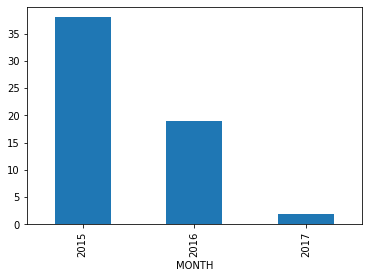

In [71]:
## Prepare analysis of each year for # of collisions, persons injured and persons killed.
nyCollisionDataFinal['DATE'] = pd.to_datetime(nyCollisionDataFinal['DATE'])
nyCollisionDataFinal['YEAR'] = nyCollisionDataFinal['DATE'].dt.year
collisionDetailsByYear = nyCollisionDataFinal.groupby('YEAR')
collisionDetailsByYear['MOTORISTS KILLED'].sum().plot(kind='bar')

## Analysis  

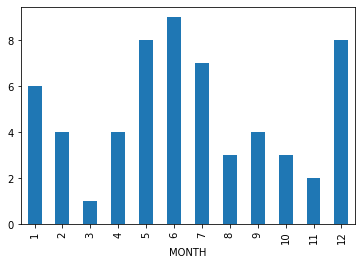

In [73]:
## Prepare analysis of each month (regardless of year) 
## for number of collisions, persons injured and persons killed.
nyCollisionDataFinal['MONTH'] = nyCollisionDataFinal['DATE'].dt.month
collisionDetailsByYear = nyCollisionDataFinal.groupby('MONTH')
collisionDetailsByYear['MOTORISTS KILLED'].sum().plot(kind='bar')